# Key Choices in QM Calculations

Two key choices in QM calculations are the basis set and level of theory. Each choice leads to a different tradeoff between accuracy and computational cost.

In this exercise, we will illustrate the impact of these choices by comparing radial distribution functions for different types of orbitals and energies computed using different levels of theory. This exercise is based on Labs 2 and 3 of [Computational Chemistry for Chemistry Educators](http://www.computationalscience.org/ccce/about/labs/labs.php).

# Part 0 - Setting up the appropriate software

In [ ]:
#@title Install packages with pip
#@markdown pyscf (Python-based Simulations of Chemistry Framework), for QM electronic structure calculation \\
#@markdown jsme_notebook, to sketch structures \\
#@markdown pyberny, for optimization \\
#@markdown geometric, for optimization \\
#@markdown condacolab, to install other packages \\
#@markdown
#@markdown Installing condacolab will restart the kernel and you can continue with the next cell.

!pip install pyscf
!pip install git+https://github.com/pyscf/semiempirical
!pip install -U pyberny
!pip install geometric
!pip install jsme_notebook

try:
    import google.colab
    !pip install condacolab
    import condacolab
    condacolab.install_mambaforge()
except ModuleNotFoundError:
    pass

In [ ]:
#@title Install packages with conda
#@markdown rdkit, to generate initial structures from SMILES strings \\
#@markdown py3Dmol, for visualization of structures \\

try:
    import condacolab
    condacolab.check()
    !mamba install --yes -c conda-forge rdkit py3Dmol
except ModuleNotFoundError:
    on_colab = False
else:
    #check if installation was succesful
    try:
        import rdkit
        on_colab = True
        from IPython.display import clear_output
        clear_output()  # clear the excessive installation outputs
        print("Dependencies successfully installed!")
    except ModuleNotFoundError:
        print("Error while installing dependencies!")

# Part 1 - Hydrogen Orbitals

The Bohr model of an atom involves visualizing the electrons as fixed in "orbits", moving at a constant radius around the nucleus. During the early part of the 20th century, serious chemical and physical errors were found in that model, and a new idea took its place. Electrons do not move in fixed orbits, with a constant radius, the theory says, but in random paths, only maintaining some semblance of organization. This theory fits with other quantum theory by saying that we cannot predict the behavior of an individual electron precisely, but we can know general properties about it, and we can know certain things about the behavior of a group of electrons. The form that electrons take around the nucleus is a sort of "cloud". That is, we cannot know the individual locations and movements of certain electrons, but we know where they will spend a percentage of their time. This is the same as saying that if we could take a snapshot of the atom, the cloud is the region where the electrons would appear in almost every one of the snapshots. This cloud is called an "orbital".

The orbital can be represented mathematically by a wave function. This is a
mathematical abstraction which has no exact physical meaning. If the wave function is squared and multiplied by some factors, it represents the actual probability of the presence of the electron at a given place and time. However, examining the graph of the wave function can help us understand how electron clouds are handled computationally.

The orbital representations that we will be working with are called Slater type
orbitals (STOs) and Gaussian type orbitals (GTOs). These two are about equally hard to compute for hydrogen, but the STOs increase in mathematical complexity too much to be useful once several electrons are introduced. GTOs are used as the next best approximation of the actual wave function. These approximations are used in ab initio and DFT methods to mathematically calculate the appearance of electron clouds and orbitals. However, once a molecule begins to be complex, (approximately more than 50 heavy atoms), even the GTO approximation is quite computationally expensive to be used.

The formulas for the STO wave function and the GTO wave function are shown
below. Notice the similarities and differences in the two equations. Both are functions of the radius, squared in the case of the GTO equation. Both have constant terms with $\pi$ in the denominator.

STO = $\left( \frac{\zeta^3}{\pi} \right)^{0.5} e^{-\zeta r}$

GTO = $\left( \frac{2\alpha}{\pi} \right)^{0.75} e^{-\alpha r^2}$

## Comparing STO and GTO

We will be modeling the simplest of atoms, hydrogen. As you know, the most common form of hydrogen has only one proton as its nucleus and a single electron in the orbital. However, even this basic form requires complex calculations for a realistic model! To model the electron cloud(s), several numerical constants are needed. The set of constants that are used for a given atom, with a given level of complexity in the mathematical representation, is called the basis set. The name of the basis set is often indicative of how
it is constructed. For example, STO-3G is an approximation of a Slater type orbital using three Gaussian functions in the approximation. Gaussian functions are similar in shape to the bell curve, or normal distribution, which you have seen. A number of these curves are combined, or superimposed, to create another, more precise, approximation. You will investigate how the Gaussian functions are computed, combined, and how the number of Gaussians affects the accuracy of the combined model.

--> Modify the code below to plot a STO and a GTO for hydrogen with the given ζ and α values.

In [ ]:
ζ = 1.24 # For STO
α = 0.36957 # For GTO

import numpy as np
r = np.linspace(0,6,601)

STO = lambda r, ζ: np.sqrt(ζ**3/np.pi)*np.exp(-ζ)
GTO = lambda r, α: (α/np.pi)**0.75*np.exp(-α*r)

import matplotlib.pyplot as plt
plt.plot(r, STO(r, ζ), label='STO')
plt.plot(r, GTO(r, α), label='GTO')
plt.title('Comparison of Orbitals')
plt.xlabel('Radius (Å)')
plt.ylabel('Ψ (Å)')
plt.legend();

--> How do the STO and GTO wavefunctions compare?

## Comparing STO and STO-3G

For this next part, you will create an approximation to the STO wave function
by combining three GTO orbitals. This basis set is known as an STO-3G basis set, since it is constructed by adding together three GTOs. The next task is to create three new GTO wave functions. Each of these GTOs has its own value for α.

pySCF has these values stored in a database. The following code will show the values for hydrogen in a format [described in the documentation](https://pyscf.org/user/gto.html#basis-format). In addition to α values τhe code will provide contraction coefficients so that the wavefunction is normalized. In total the wavefunction is,

LCAO = c$_1$GTO$_1$ + c$_2$GTO$_2$ + c$_3$GTO$_3$

In [ ]:
import pyscf
from pyscf import gto
sto3g_H = gto.basis.load('sto3g', 'H')
print(sto3g_H)

--> Modify the code below to plot a STO and STO-3G with the appropriate α values for hydrogen.

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r, STO(r, ζ), label='STO')
plt.plot(r, sto3g_H[0][1][1]*GTO(r, sto3g_H[0][1][0]) + \
            sto3g_H[0][3][1]*GTO(r, sto3g_H[0][3][0]), label='STO-3G')
plt.title('Comparison of Orbitals')
plt.xlabel('Radius (Å)')
plt.ylabel('Ψ (Å)')
plt.legend();

--> Is STO-3G more similar to STO than GTO?

# Part 2 - Proton Affinity for Pyridine

We will compute the enthalpy of the protonaton of pyridine,

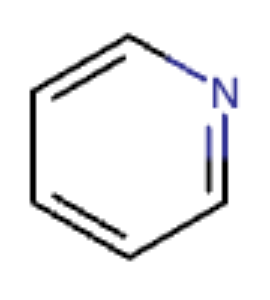

We will compare results from different levels of theory: semi-empirical, Hartree-Fock, and density functional theory (DFT).

## Levels of Theory



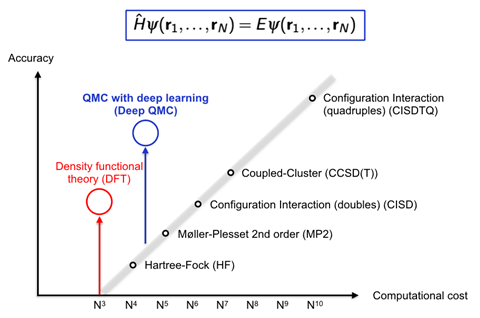       
Figure 2: QM Theory levels. (Source: Article on quantum chemistry simulations. [Link](https://www.chemistryworld.com/news/quantum-chemistry-simulations-offers-beguiling-possibility-of-solving-chemistry/4011541.article)  )

## Obtaining a SMILES string

In [ ]:
#@title You may use this widget to draw a molecule to get the SMILES string
from jsme_notebook import JSMENotebook
smiles = 'CCO'
jsme = JSMENotebook(smiles)

In [ ]:
#@title Run cell to generate SMILES code from cell above
jsme.smiles

Besides this widget there are several web servers that allow you to sketch a molecule to obtain a SMILES code, including at [the RCSB](https://www.rcsb.org/chemical-sketch) and [molview](https://molview.org/).

## QM calculations of pyridine

--> Enter the SMILES string of pyridine and run the cell below.

In [ ]:
#@title Structure generation and visualization of pyridine
#@markdown rdkit is used to generate the structure and add hydrogen atoms \\
#@markdown py3dmol is used to visualize the structure
smiles = 'CC' #@param

from rdkit import Chem
from rdkit.Chem import AllChem

rdkit_mol = Chem.AddHs(Chem.MolFromSmiles(smiles))
AllChem.EmbedMolecule(rdkit_mol)

import py3Dmol
view = py3Dmol.view()
view.addModel(Chem.MolToMolBlock(rdkit_mol),'mol')
view.setStyle({'model':0}, {'stick': {}})
view.zoomTo()
view.show()

print(Chem.MolToXYZBlock(rdkit_mol))

In [ ]:
from pyscf import gto, scf
from pyscf.geomopt.berny_solver import optimize

# Define molecule and basis set
gto_mol = gto.Mole() # Gaussian-type orbitals
gto_mol.atom = Chem.MolToXYZBlock(rdkit_mol)[3:] # First two lines are number of atoms
gto_mol.verbose = False
gto_mol.basis = '631g*'
gto_mol.build();

### Minimize the Hartree-Fock energy

In [ ]:
mf = scf.RHF(gto_mol)
E_mf = mf.run().e_tot

gto_mol_min = optimize(mf)
E_mf_min = scf.RHF(gto_mol_min).run().e_tot

print (f'HF energy: {E_mf_min:.5f} Hartrees')
print('The coordinates of the minimized molecule are:')
print(gto_mol_min.tostring('xyz'))

### Compute the energy using other levels of theory

In [ ]:
mf_MP2 = mf.MP2().run()
print(f'MP2 energy: {mf_MP2.e_tot:.5f} Hartrees')

mf_CISD = mf.CISD().run()
print(f'CISD energy: {mf_CISD.e_tot:.5f} Hartrees')

from pyscf import dft
mf = dft.RKS(gto_mol_min)
mf_DFT = mf.kernel()
print (f'DFT energy: {mf_DFT:.5f} Hartrees')

## QM calculations of the pyridinium ion

--> Enter the SMILES string of the pyridinium ion (positive charge on nitrogen) and run the cell below.

In [ ]:
#@title Structure generation and visualization of the pyridinium ion
#@markdown rdkit is used to generate the structure and add hydrogen atoms \\
#@markdown py3dmol is used to visualize the structure
smiles = 'CC' #@param

from rdkit import Chem
from rdkit.Chem import AllChem

rdkit_mol = Chem.AddHs(Chem.MolFromSmiles(smiles))
AllChem.EmbedMolecule(rdkit_mol)

import py3Dmol
view = py3Dmol.view()
view.addModel(Chem.MolToMolBlock(rdkit_mol),'mol')
view.setStyle({'model':0}, {'stick': {}})
view.zoomTo()
view.show()

print(Chem.MolToXYZBlock(rdkit_mol))

### Minimize the Hartree-Fock energy

The code below has an important difference from the pyridine code: we specify a charge of 1.

In [ ]:
# Define molecule and basis set
gto_mol = gto.Mole() # Gaussian-type orbitals
gto_mol.atom = Chem.MolToXYZBlock(rdkit_mol)[3:] # First two lines are number of atoms
gto_mol.charge = 1
gto_mol.verbose = False
gto_mol.basis = '631g*'
gto_mol.build()

mf = scf.RHF(gto_mol)
E_mf = mf.run().e_tot

gto_mol_min = optimize(mf)
E_mf_min = scf.RHF(gto_mol_min).run().e_tot

print (f'HF energy: {E_mf_min:.5f} Hartrees')
print('The coordinates of the minimized molecule are:')
print(gto_mol_min.tostring('xyz'))

### Compute the energy using other levels of theory

In [ ]:
mf_MP2 = mf.MP2().run()
print(f'MP2 energy: {mf_MP2.e_tot:.5f} Hartrees')

mf_CISD = mf.CISD().run()
print(f'CISD energy: {mf_CISD.e_tot:.5f} Hartrees')

from pyscf import dft
mf = dft.RKS(gto_mol_min)
mf_DFT = mf.kernel()
print (f'DFT energy: {mf_DFT:.5f} Hartrees')

## Affinity estimation

--> Complete the table below. For every level of theory, estimate the affinity of a proton for pyridine based on the difference between energies of the pyridinium ion and pyridine. Given that the literature value is -219.2 kcal/mol = -0.3493 Hartrees, compute the percent error.

| Level | Pyridine   | Pyridinium | Difference | % Error |
| ----- | ---------- | ---------- | ---------- | ------- |
| HF    |  |  |  |  |
| MP2   |  |  |  |  |
| MP2   |  |  |  |  |
| CISD  |  |  |  |  |
| DFT   |  |  |  |  |